In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
#defining all categories
categories=['alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x','misc.forsale','rec.autos', 'rec.motorcycles',
 'rec.sport.baseball','rec.sport.hockey','sci.crypt','sci.electronics','sci.med','sci.space','soc.religion.christian','talk.politics.guns','talk.politics.mideast','talk.politics.misc','talk.religion.misc']

In [5]:
#Training the data on these categories
train=fetch_20newsgroups(subset='train',categories=categories,shuffle=True, random_state=42)

In [6]:
#Testing the data on these categories
test=fetch_20newsgroups(subset='test',categories=categories,shuffle=True, random_state=42)

In [7]:
train.target.shape

(11314,)

In [8]:
test.target.shape

(7532,)

In [9]:
train.target[:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [10]:
for t in train.target[:5]:
  print(train.target_names[t])

rec.autos
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.graphics
sci.space


In [11]:
#Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train.data)
X_train_counts.shape

(11314, 130107)

In [13]:
#Transform a count matrix to a normalized tf or tf-idf representation.
from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

In [15]:
#Classifier using Ridge regression.
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RidgeClassifier()),
])

In [16]:
text_clf.fit(train.data, train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RidgeClassifier())])

In [17]:
#Evaluation of the performance on the test set
predicted = text_clf.predict(test.data)
np.mean(predicted == test.target)

0.8534253850238981

In [18]:
#creating confussion matrix and heat map
from sklearn.metrics import confusion_matrix

In [19]:
from sklearn import metrics
print(metrics.classification_report(test.target, predicted,
    target_names=test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.81      0.77      0.79       319
           comp.graphics       0.76      0.81      0.78       389
 comp.os.ms-windows.misc       0.77      0.75      0.76       394
comp.sys.ibm.pc.hardware       0.72      0.77      0.74       392
   comp.sys.mac.hardware       0.83      0.86      0.85       385
          comp.windows.x       0.88      0.75      0.81       395
            misc.forsale       0.85      0.89      0.87       390
               rec.autos       0.92      0.91      0.91       396
         rec.motorcycles       0.95      0.95      0.95       398
      rec.sport.baseball       0.92      0.95      0.94       397
        rec.sport.hockey       0.96      0.97      0.97       399
               sci.crypt       0.94      0.95      0.94       396
         sci.electronics       0.81      0.78      0.79       393
                 sci.med       0.90      0.88      0.89       396
         

Text(89.17999999999999, 0.5, 'predicted label')

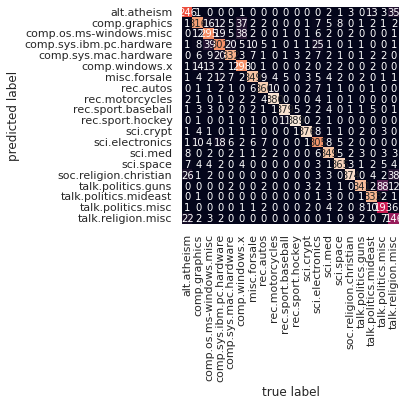

In [20]:
mat=confusion_matrix(test.target,predicted)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=train.target_names,yticklabels=train.target_names)
#plotting Heatmap of Confusion Matrix
plt.xlabel('true label')
plt.ylabel('predicted label')

In [21]:
#Creating a model based on support vector machine (SVM)
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

In [22]:
#Training the model with the train data
text_clf.fit(train.data, train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [23]:
#Evaluation of the performance on the test set
predicted = text_clf.predict(test.data)
np.mean(predicted == test.target)

0.8248805098247477

In [24]:
from sklearn import metrics
print(metrics.classification_report(test.target, predicted,
    target_names=test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.73      0.71      0.72       319
           comp.graphics       0.78      0.72      0.75       389
 comp.os.ms-windows.misc       0.73      0.78      0.75       394
comp.sys.ibm.pc.hardware       0.74      0.67      0.70       392
   comp.sys.mac.hardware       0.81      0.83      0.82       385
          comp.windows.x       0.84      0.76      0.80       395
            misc.forsale       0.84      0.90      0.87       390
               rec.autos       0.91      0.90      0.90       396
         rec.motorcycles       0.93      0.96      0.95       398
      rec.sport.baseball       0.88      0.90      0.89       397
        rec.sport.hockey       0.88      0.99      0.93       399
               sci.crypt       0.84      0.96      0.90       396
         sci.electronics       0.83      0.62      0.71       393
                 sci.med       0.87      0.86      0.87       396
         

Text(89.17999999999999, 0.5, 'predicted label')

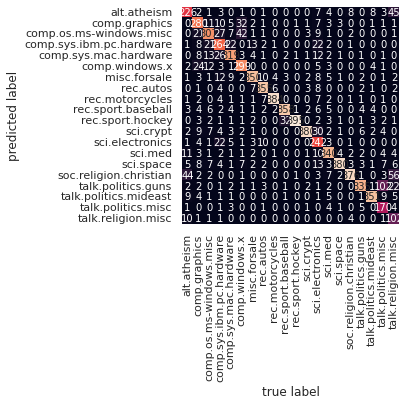

In [25]:
mat=confusion_matrix(test.target,predicted)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=train.target_names,yticklabels=train.target_names)
#plotting Heatmap of Confusion Matrix
plt.xlabel('true label')
plt.ylabel('predicted label')